In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from matplotlib.patches import Patch
import plotly.graph_objects as go
import seaborn as sns
import math as m
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K-means Data Science/projeto kmeans/Banknote-authentication-dataset-.csv')

In [ ]:
df.loc[:,['V1','V2']]

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


Recebi dados não rotulados de imagem de notas de moedas.
Vamos analisar como é a distribuição

In [ ]:
kmeans = KMeans(n_clusters=2).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

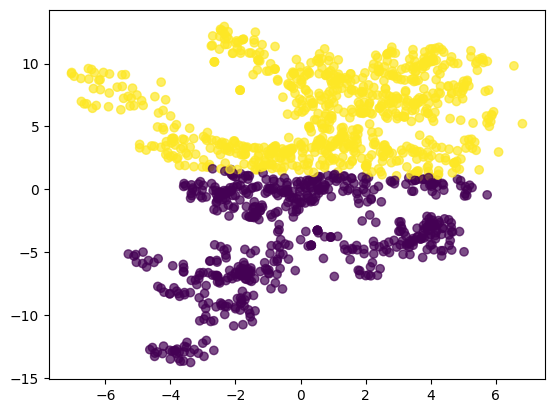

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df['V1'],df['V2'], c = kmeans.labels_, alpha = 0.7 )

plt.show()

In [ ]:
# Normalizando os dados usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# note que scaled_data é uma array
type(scaled_data)

numpy.ndarray

In [ ]:
# Aplicando o K-means aos dados normalizados
kmeans_n = KMeans(n_clusters=2).fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_n.labels_
kmeans_n.cluster_centers_

array([[-0.850656  , -0.6310923 ],
       [ 0.65527953,  0.48614465]])

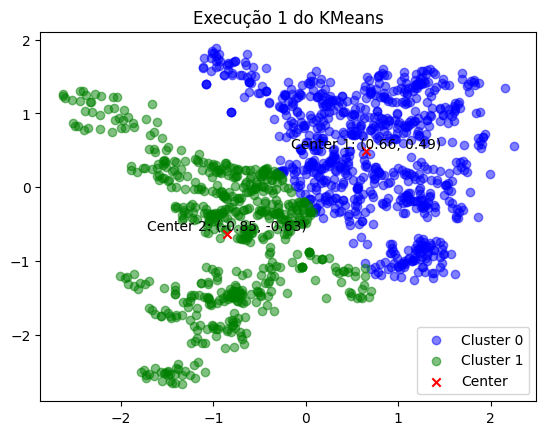

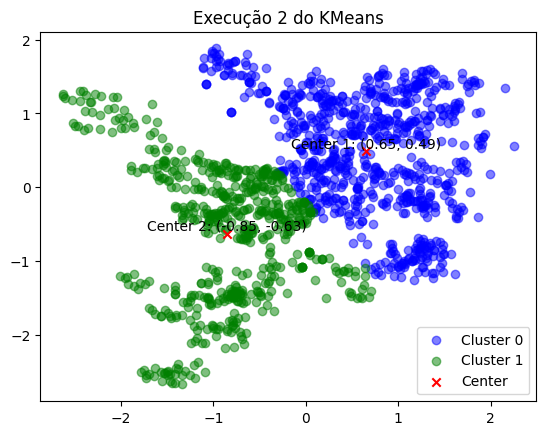

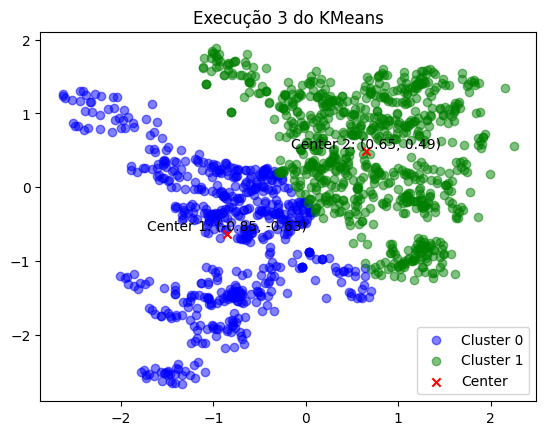

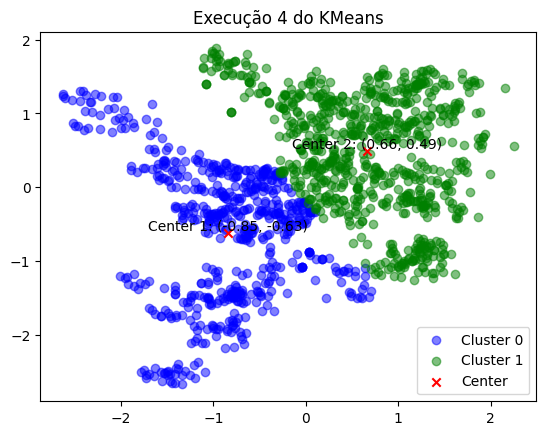

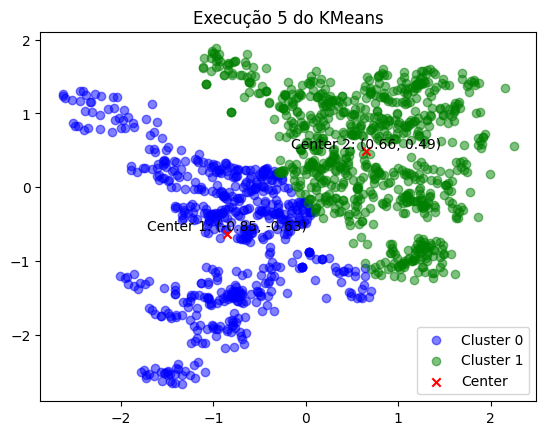

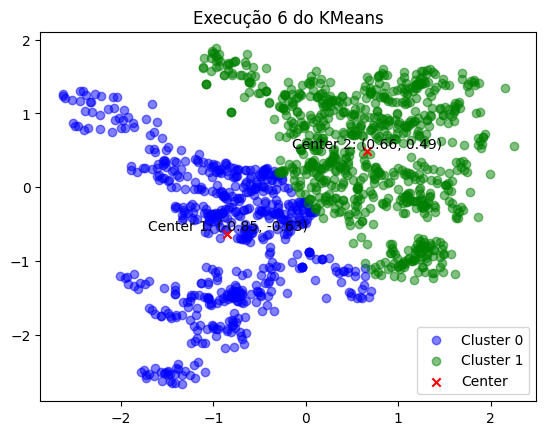

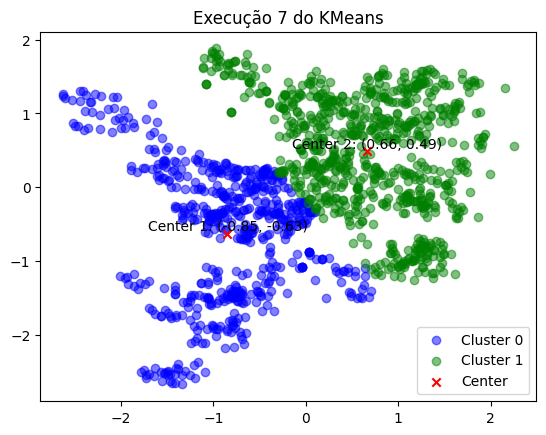

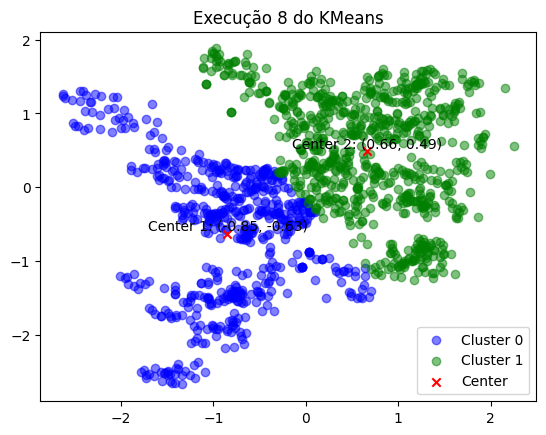

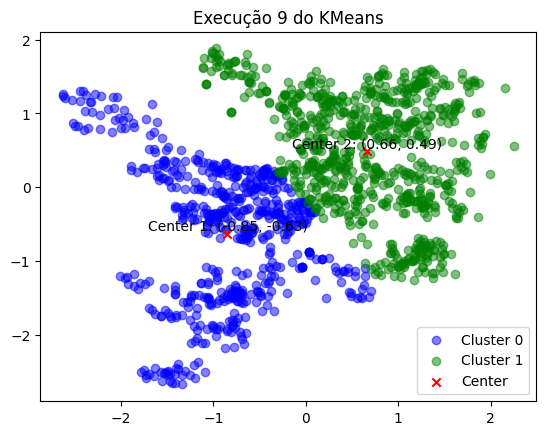

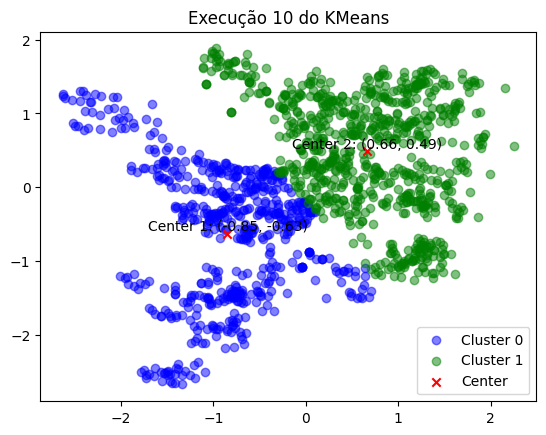

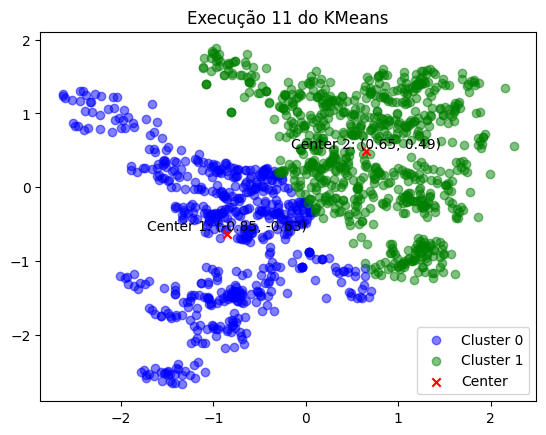

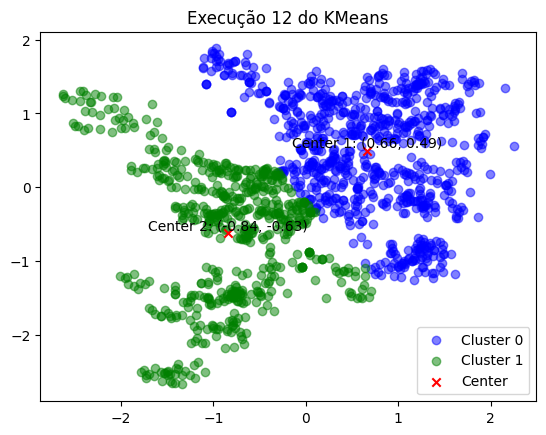

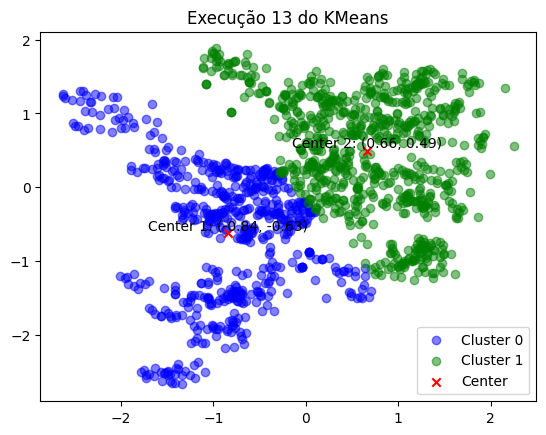

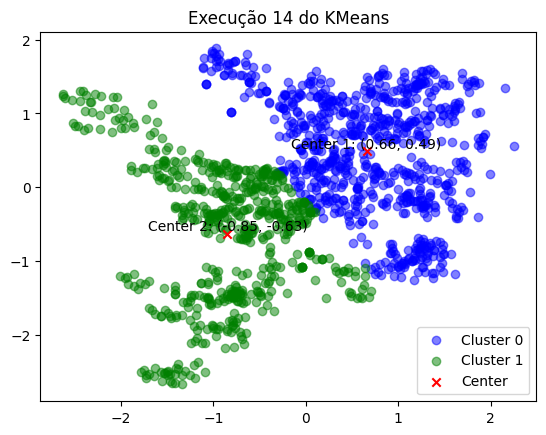

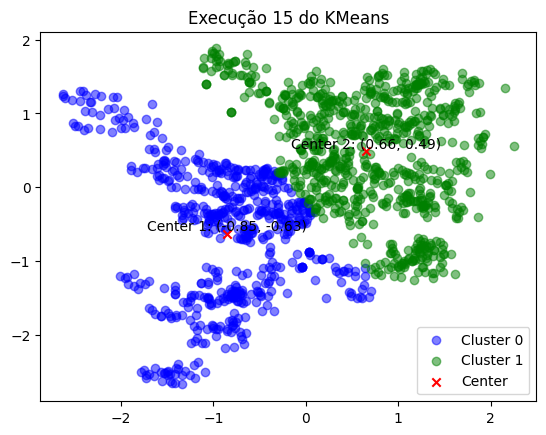

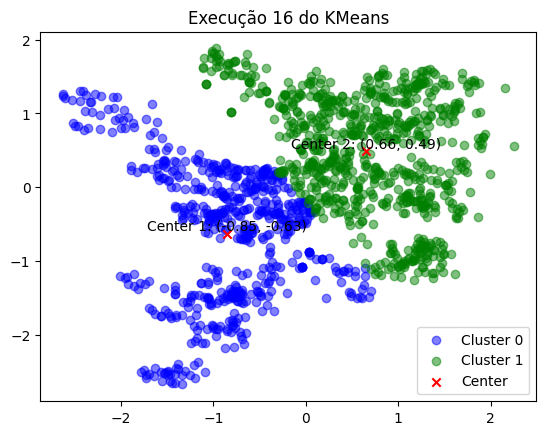

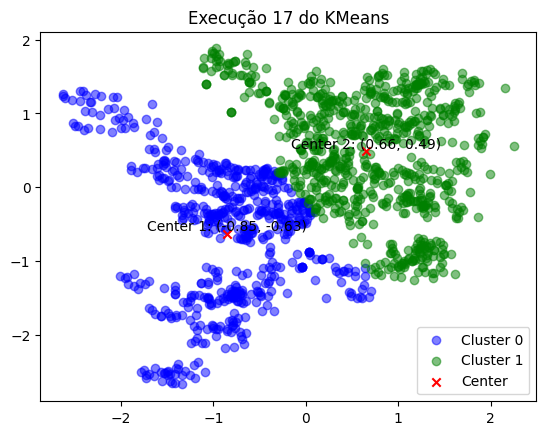

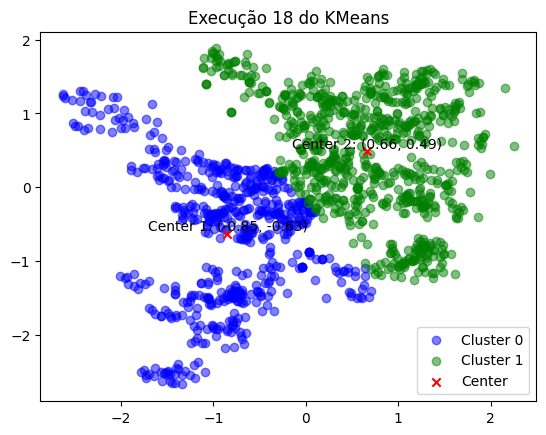

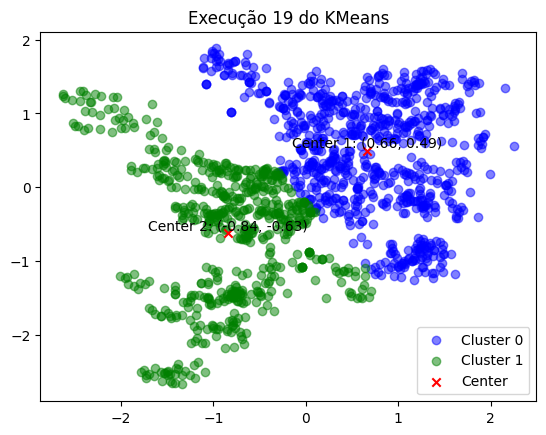

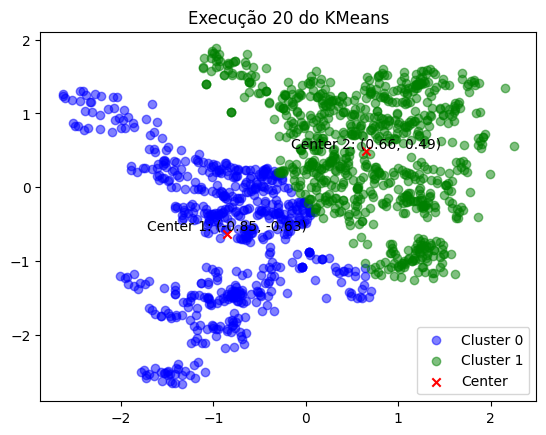

[array([[ 0.65527953,  0.48614465],
       [-0.850656  , -0.6310923 ]]), array([[ 0.65446883,  0.48520092],
       [-0.8521272 , -0.63173812]]), array([[-0.8521272 , -0.63173812],
       [ 0.65446883,  0.48520092]]), array([[-0.84719507, -0.62784573],
       [ 0.65844176,  0.487963  ]]), array([[-0.850656  , -0.6310923 ],
       [ 0.65527953,  0.48614465]]), array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]]), array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]]), array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]]), array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]]), array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]]), array([[-0.8521272 , -0.63173812],
       [ 0.65446883,  0.48520092]]), array([[ 0.65980565,  0.49421108],
       [-0.83895818, -0.62840084]]), array([[-0.83895818, -0.62840084],
       [ 0.65980565,  0.49421108]]), array([[ 0.65722693,  0.48757905],
       [-0.84814093, -0.6292

In [ ]:
from sklearn.metrics import silhouette_score
n_runs = 20
cores = np.array(['b', 'g'])

# lista para armazenar os centroidos
centroid_list = []
silhouette_scores = []
# numeros de execução de treino kmeans
for i in range(n_runs):
  km_res = KMeans(n_clusters=2, n_init=10).fit(scaled_data)

  # dados para análises:
  center = km_res.cluster_centers_   # retorna o centro do treino
  labels = km_res.labels_  # acesso dos rótulos dos cluster
  centroid_list.append(center)
  silhouette_avg = silhouette_score(scaled_data, labels)
  silhouette_scores.append(silhouette_avg)

  for cluster_id in np.unique(labels):  # com tem dois cluster [0,1]
    plt.scatter(scaled_data[labels == cluster_id,0], # condição labels == cluster_id
                scaled_data[labels == cluster_id,1],
                color = cores[cluster_id],
                alpha = 0.5,
                label = f'Cluster {cluster_id}')
  # fazer um marca do centroide
  plt.scatter(center[:,0],center[:,1], marker = 'x', color = 'red',label = f'Center')
  plt.title(f'Execução {i+1} do KMeans')

  # Adicionando texto com as coordenadas dos centroides
  for idx, c in enumerate(center):
    plt.text(c[0], c[1], f'Center {idx+1}: ({c[0]:.2f}, {c[1]:.2f})', fontsize=10, ha='center', va='bottom')

  plt.legend()

  #salvando imagens caso necessário
  #plt.savefig(f'Imagem {i}')
  plt.show()

print(centroid_list)

In [ ]:
from PIL import Image
# vou salvar as imagens do treino e colocar em uma só
# Lista com os nomes dos arquivos das 10 imagens
nomes_imagens = ['/content/Imagem 5.png', '/content/Imagem 6.png',
                 '/content/Imagem 7.png','/content/Imagem 16.png',
                 '/content/Imagem 17.png', '/content/Imagem 19.png']

# Abrir as n imagens
imagens = [Image.open(nome) for nome in nomes_imagens]

# Obter as dimensões de uma imagem individual
largura_imagem, altura_imagem = imagens[0].size

# Calcular as dimensões da nova imagem composta
largura_composta = largura_imagem * 3  # 4 colunas
altura_composta = altura_imagem * 2  # 3 linhas

# Criar uma nova imagem composta
imagem_composta = Image.new('RGB', (largura_composta, altura_composta))

# Posições iniciais para colocar as imagens na grade
posicao_x = 0
posicao_y = 0

# Colocar as imagens na nova imagem composta na grade 3x4
for imagem in imagens:
    # Colar a imagem na posição atual
    imagem_composta.paste(imagem, (posicao_x, posicao_y))

    # Atualizar a posição x para a próxima coluna
    posicao_x += largura_imagem

    # Verificar se já chegamos ao final de uma linha
    if posicao_x >= largura_composta:
        posicao_x = 0  # Reiniciar na primeira coluna
        posicao_y += altura_imagem  # Passar para a próxima linha

# Salvar a nova imagem composta
imagem_composta.save('imagem_composta_grid.jpg')

[array([[ 1.,  1.],
        [-1., -1.]]),
 array([[ 1.,  1.],
        [-1., -1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[ 1.,  1.],
        [-1., -1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[ 1.,  1.],
        [-1., -1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1., -1.],
        [ 1.,  1.]]),
 array([[ 1.,  1.],
        [-1., -1.]]),
 array([[-1., -1.],
        [ 1.,  1.]])]

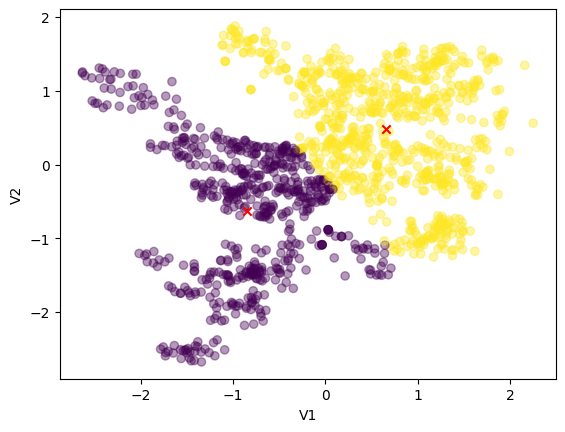

In [ ]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c = kmeans_n.labels_, alpha = 0.4)
plt.scatter(kmeans_n.cluster_centers_[:,0],kmeans_n.cluster_centers_[:,1], marker = 'x', color = 'red')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

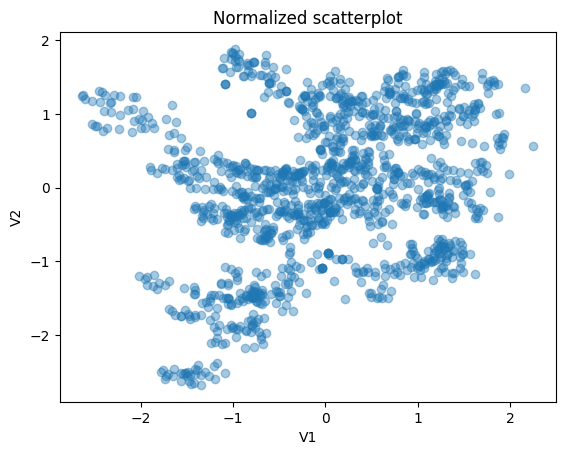

In [ ]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], alpha = 0.4)
#plt.scatter(kmeans_n.cluster_centers_[:,0],kmeans_n.cluster_centers_[:,1], marker = 'x', color = 'red')
plt.xlabel('V1')
plt.title('Normalized scatterplot')
plt.ylabel('V2')
plt.show()

Dois grupos, um grupo a e outro b

Tarefa: encontrar a melhor quantidade de cluster para separar os dados
Método do cotovelo (Elbow Method) para determinar o melhor valor de k

In [ ]:
valores_k = [] # lsita de numero de cluster
inercias = [] # inercias (somas dos quadrados das distâncias)

for i in range(1,15):
  kmeans_n = KMeans(n_clusters=i, n_init = 100).fit(scaled_data)
  valores_k.append(i)
  inercias.append(kmeans_n.inertia_)
  print(kmeans_n.inertia_)


2743.999999999999
1558.29069058075
1098.6573071708308
779.6569604512582
572.4901184230413
460.38722667426214
385.13547252328783
328.78327319057456
286.3692021983625
251.5097953329216
224.04864616254508
203.70196183959396
185.39786462827988
167.87416773842503


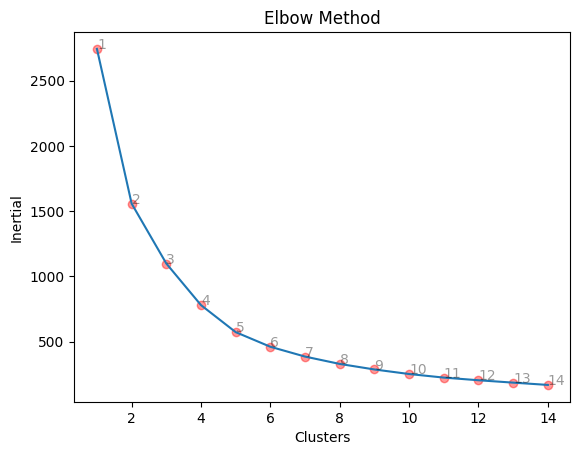

In [ ]:
# Gráfico de linha (plot) com marcadores e rótulos
for i, (x, y) in enumerate(zip(valores_k, inercias)):
    plt.plot(x, y, marker='o', color ='red', alpha = 0.4)
    plt.text(x, y, f'{x}', alpha=0.4)

# Adicionar rótulos e legendas
plt.plot(valores_k, inercias)
plt.xlabel('Clusters')
plt.ylabel('Inertial')
plt.title('Elbow Method')


# Mostrar o gráfico
plt.show()

In [ ]:
len(inercias)

In [ ]:
# calculo análitico: maior distânci entre a inérci e a reta que passa entre os extremos
x1, y1 = 1, inercias[0]
x2 , y2 = 14, inercias[len(inercias)-1]
distances = []
for i in range(len(inercias)):
  x0 = i+1
  y0 = inercias[i]
  numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
  denominator = ((y2 - y1)**2 + (x2 - x1)**2)**(1/2)
  distances.append(numerator/denominator)

# + 1 pq não existe valor para cluster 0
distances.index(max(distances)) + 1

5

Cotovelos claros em 2 e 1?
Como comparar os modelos 2 e 1
vamos utilizar métricas:
- Rand Index: mede a semelhança de classe entre 2 pontos:
Aqui eu preciso do dados reais. Vou capturar do banco de dados real (openML)

O Índice Rand Ajustado (Adjusted Rand Index - ARI) é uma métrica de avaliação externa utilizada para medir a similaridade entre dois agrupamentos de dados, normalmente entre um agrupamento gerado por um algoritmo de clustering e um agrupamento de referência (ground truth). Ele retorna um valor entre -1 e 1, onde:

- Um valor de ARI próximo de 1 indica uma concordância perfeita entre os agrupamentos, ou seja, os clusters são idênticos.
- Um valor de ARI próximo de 0 indica uma concordância aleatória entre os agrupamentos, ou seja, os clusters são independentes uns dos outros.
- Um valor de ARI próximo de -1 indica uma discordância perfeita entre os agrupamentos, ou seja, os clusters são diametralmente opostos.


In [ ]:
from scipy.io.arff import loadarff
from sklearn.datasets import fetch_openml

In [ ]:
dataset = fetch_openml(data_id=1462)

# Converter o conjunto de dados para um DataFrame do Pandas
df_true = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Adicionar a coluna de target ao DataFrame
df_true['target'] = dataset.target

# Exibir as primeiras linhas do DataFrame
# ipc: os dados reais tem target 1 for genuine and 2 for forged

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
df_true['target'].value_counts()

# como garantir o tipo inteiro
df_true['target'] = df_true['target'].astype(int)

In [ ]:
df_true = np.array(df_true['target'])

In [ ]:
df_true

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
type(kmeans_n.labels_)

numpy.ndarray

In [ ]:
# teste para cluster 2
kmeans_n2 = KMeans(n_clusters=2).fit(scaled_data)
kmeans_n2.labels_
metrics.adjusted_rand_score(df_true,kmeans_n2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5697873571739156

In [ ]:
# vamos percorrer os k cluster e comparar com df_true (classes de dados original)
valores_k = [] # lista de numero de cluster
ARI = [] # inercias (somas dos quadrados das distâncias)

for i in range(1,15):
  kmeans_n = KMeans(n_clusters=i, n_init = 100).fit(scaled_data)
  valores_k.append(i)
  ARI.append(metrics.adjusted_rand_score(df_true,kmeans_n.labels_))


In [ ]:
ARI

[0.0,
 0.5719910925658024,
 0.3411006087601392,
 0.26833122454223435,
 0.2805664392550599,
 0.2124855248474192,
 0.21345224167380178,
 0.18644332542139258,
 0.15878195763450967,
 0.14757863787641515,
 0.14142109215500442,
 0.1376481190641414,
 0.11763034089531103,
 0.11047837706973897]

In [ ]:
# o maior valor é o interessante

# Criar uma lista de tuplas (valores_k, ARI) usando zip
val_ari = list(zip(valores_k, ARI))
# Encontrar a tupla com o maior valor de ARI
max_ari = max(val_ari, key=lambda x: x[1])
max_ari

(2, 0.5719910925658024)

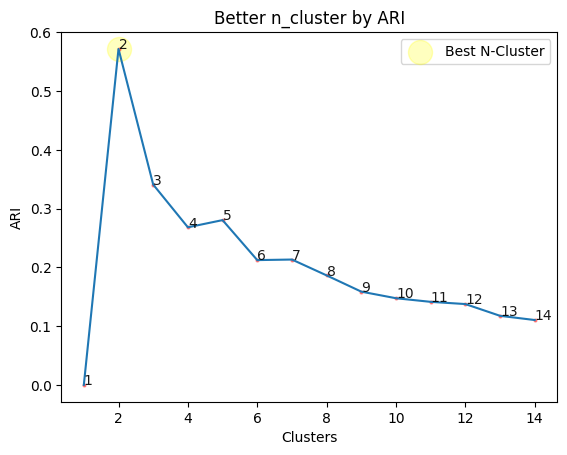

In [ ]:
# Gráfico de linha (plot) com marcadores e rótulos
for i, (x, y) in enumerate(zip(valores_k, ARI)):
    plt.plot(x, y, marker='o', markersize = 2, color ='red', alpha = 0.4)
    plt.text(x, y, f'{x}', alpha=0.9)

# Plotar o ponto de interesse com uma seta
# Desenhar um círculo transparente ao redor do ponto
plt.scatter(max_ari[0],max_ari[1],s=300, color='yellow', alpha=0.25, label='Best N-Cluster')

# Adicionar rótulos e legendas
plt.plot(valores_k, ARI)
plt.xlabel('Clusters')
plt.ylabel('ARI')
plt.title('Better n_cluster by ARI')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
list(zip(valores_k, ARI))

[(1, 0.0),
 (2, 0.5719910925658024),
 (3, 0.3411006087601392),
 (4, 0.26833122454223435),
 (5, 0.2805664392550599),
 (6, 0.2124855248474192),
 (7, 0.21345224167380178),
 (8, 0.18644332542139258),
 (9, 0.15878195763450967),
 (10, 0.14757863787641515),
 (11, 0.14142109215500442),
 (12, 0.1376481190641414),
 (13, 0.11763034089531103),
 (14, 0.11047837706973897)]

In [ ]:
max_ari[1]

0.5719910925658024

Mas a ideia é que não temos os dados verdadeiros?
Por coeficiente de silhueta:
- Mede a distância média entre uma amoastra e todos os utros pontos da mesma classe
- A distância média entre uma amostra e todos os outros pontos no outro cluster mais próximo

syntaxe


```
#  metrics.silhouette_score(data,kmeans.labels_)
```

onde são data são seus dados e kmeans.labels_ são os rótulos pós treino

In [ ]:
# vamos percorrer os k cluster e comparar com df_true (classes de dados original)
valores_k = [] # lista de numero de cluster
s = [] # silhuettes

for i in range(2,15):
  kmeans_n = KMeans(n_clusters=i, n_init = 100).fit(scaled_data)
  valores_k.append(i)
  s.append(metrics.silhouette_score(scaled_data,kmeans_n.labels_))


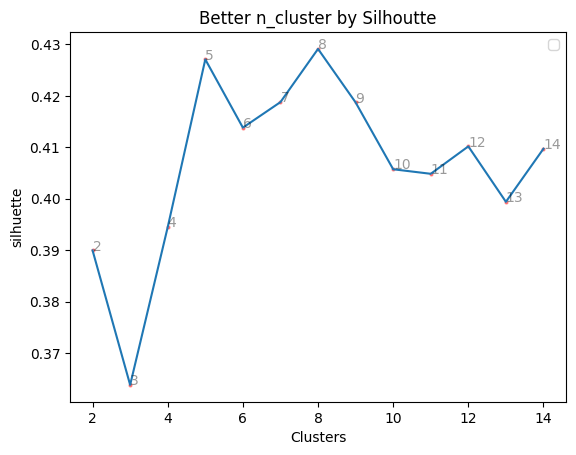

In [ ]:
# Gráfico de linha (plot) com marcadores e rótulos
for i, (x, y) in enumerate(zip(valores_k, s)):
    plt.plot(x, y, marker='o', markersize = 2, color ='red', alpha = 0.4)
    plt.text(x, y, f'{x}', alpha=0.4)


# Adicionar rótulos e legendas
plt.plot(valores_k, s)
plt.xlabel('Clusters')
plt.ylabel('silhuette')
plt.title('Better n_cluster by Silhoutte')
plt.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
# grafico de 8 cluster
kmeans_n8 = KMeans(n_clusters=8, n_init = 100).fit(scaled_data)

In [ ]:
# grafico de 5 cluster
kmeans_n5 = KMeans(n_clusters=5, n_init = 100).fit(scaled_data)

In [ ]:
# grafico de 2 cluster
kmeans_n_2 = KMeans(n_clusters=2, n_init = 100).fit(scaled_data)

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
scatter1= ax[0].scatter(scaled_data[:,0], scaled_data[:,1], c = kmeans_n8.labels_, alpha = 0.7, label = f'{len(np.unique(kmeans_n8.labels_))} Cluster')
ax[1].scatter(scaled_data[:,0], scaled_data[:,1], c = kmeans_n5.labels_, alpha = 0.7, label = f'{len(np.unique(kmeans_n5.labels_))} Cluster')
ax[2].scatter(scaled_data[:,0], scaled_data[:,1], c = kmeans_n_2.labels_, alpha = 0.7, label = f'{len(np.unique(kmeans_n_2.labels_))} Cluster')
fig.suptitle('Cluster comparison', fontsize=16, fontweight='bold')

ax[0].set_title('8 cluster')
ax[1].set_title('5 cluster')
ax[2].set_title('2 cluster')

plt.show()

ínndice de Davies-Bouldin (Davies-Bouldin Index): Mede a similaridade média entre cada cluster e seu cluster mais próximo. **Valores menores indicam clusters mais coesos e bem separados.**

In [ ]:
valores_k = []
dbs = []
for i in range(2,15):
  kmeans_n = KMeans(n_clusters=i,n_init=100).fit(scaled_data)
  valores_k.append(i)
  dbs.append(metrics.davies_bouldin_score(scaled_data, kmeans_n.labels_))


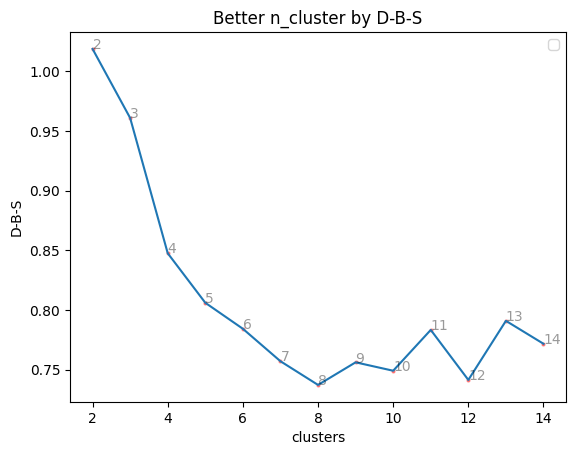

In [ ]:
# Gráfico de linha (plot) com marcadores e rótulos
for i, (x, y) in enumerate(zip(valores_k, dbs)):
    plt.plot(x, y, marker='o', markersize = 2, color ='red', alpha = 0.4)
    plt.text(x, y, f'{x}', alpha=0.4)


# Adicionar rótulos e legendas
plt.plot(valores_k, dbs)
plt.xlabel('clusters')
plt.ylabel('D-B-S')
plt.title('Better n_cluster by D-B-S')
plt.legend()

# Mostrar o gráfico
plt.show()

Índice de Calinski-Harabasz (Calinski-Harabasz Index): Mede a razão entre a dispersão intra-cluster e a dispersão entre clusters. **Valores maiores indicam clusters mais densos e bem separados.**
syntaxe:


```
# from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, kmeans.labels_)
```




In [ ]:
valores_k = []
chi = []
for i in range(2,15):
  kmeans_n = KMeans(n_clusters=i,n_init=100).fit(scaled_data)
  valores_k.append(i)
  chi.append(metrics.calinski_harabasz_score(scaled_data, kmeans_n.labels_))

In [ ]:
chi

[1042.438207276318,
 1025.108457131587,
 1148.8750159514295,
 1296.3074577326952,
 1355.126670605932,
 1393.384194099398,
 1431.4951807042614,
 1462.0247470298434,
 1499.654633737445,
 1530.6209307170582,
 1540.9114267234438,
 1563.8472598063615,
 1602.8652563938415]

In [ ]:
kmeans_n14 = KMeans(n_clusters=14,n_init=100).fit(scaled_data)

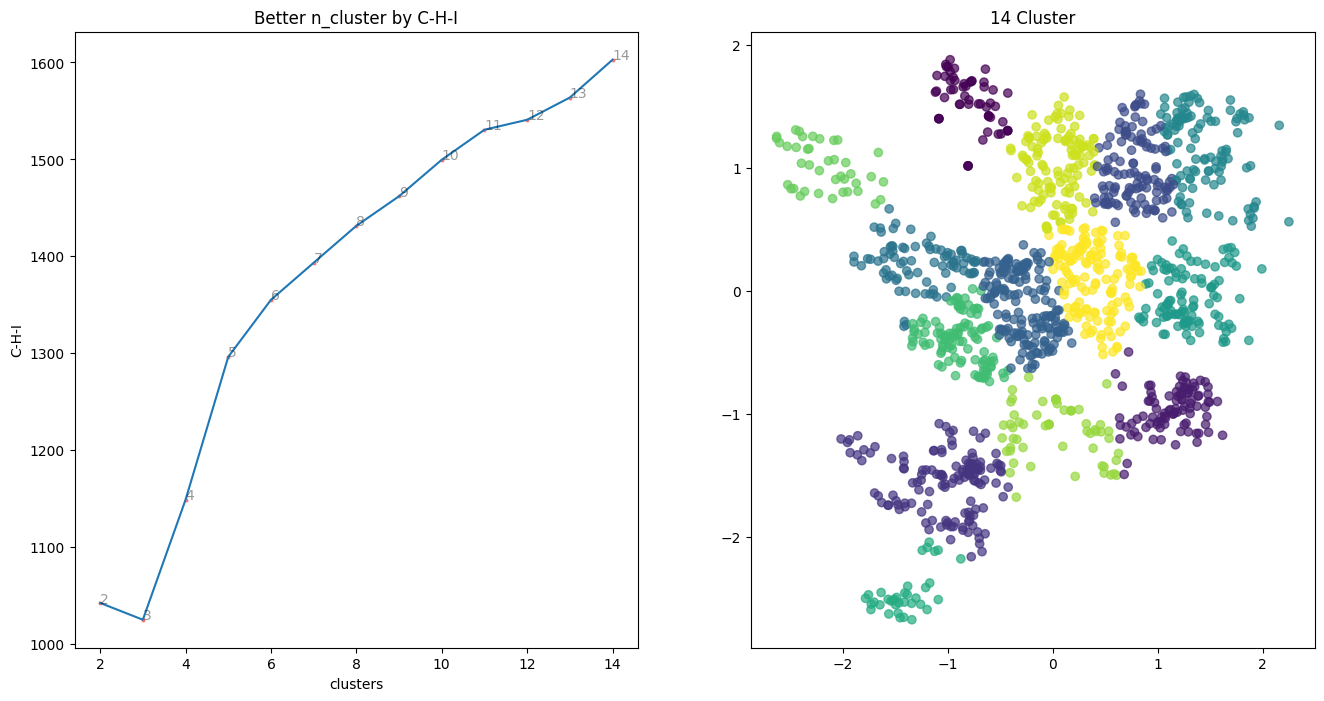

In [ ]:
# Gráfico de linha (plot) com marcadores e rótulos
fig, ax = plt.subplots(1,2, figsize = (16,8))
for i, (x, y) in enumerate(zip(valores_k, chi)):
    ax[0].plot(x, y, marker='o', markersize = 2, color ='red', alpha = 0.4)
    ax[0].text(x, y, f'{x}', alpha=0.4)


# Adicionar rótulos e legendas
ax[0].plot(valores_k, chi)
ax[0].set_xlabel('clusters')
ax[0].set_ylabel('C-H-I')
ax[0].set_title('Better n_cluster by C-H-I')

ax[1].scatter(scaled_data[:,0], scaled_data[:,1], c = kmeans_n14.labels_, alpha = 0.7)
ax[1].set_title(f'{len(np.unique(kmeans_n14.labels_))} Cluster')


# Mostrar o gráfico
plt.show()